In [12]:
global file
file = input('Selet a folder to save output') ##enter your file path here - the file is in the repo "summary_stats.csv".
raw_file = file

In [13]:
from datetime import datetime
from datetime import date
from subgrounds.subgraph import SyntheticField, FieldPath
from subgrounds.subgrounds import Subgrounds
import math
import pandas as pd
import  os as os
import duckdb as db
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
sg = Subgrounds()
snapshot = sg.load_api('https://hub.snapshot.org/graphql')

In [15]:
snapshot.Proposal.datetime = SyntheticField(
  lambda timestamp: str(datetime.fromtimestamp(timestamp)),
  SyntheticField.STRING,
  snapshot.Proposal.end,
)

In [16]:
spacename = input('spacename plz?')
# based on their url, for example "curve.eth" for  https://snapshot.org/#/curve.eth
proposals = snapshot.Query.proposals(
  orderBy='created',
  orderDirection='desc',
  first=10000,
  where=[
    snapshot.Proposal.space == spacename, ##'fuse.eth',
    snapshot.Proposal.state == 'closed'
    ##snapshot.Proposal.title == 'OIP-18: Reward rate framework and reduction',
  ]
)

In [17]:
proposals_snapshots = sg.query_df([
    proposals.title,
    proposals.id,
    proposals.body,
    proposals.scores_total
])

In [18]:
proposals_choices = sg.query(proposals.choices)

In [19]:
proposals_choices = pd.DataFrame(proposals_choices)

In [20]:
olympus_governance_view = pd.concat([proposals_snapshots,proposals_choices], axis=1)

In [21]:
##let's view the output just to make sure
olympus_governance_view.head(5)

,proposals_title,proposals_id,proposals_body,proposals_scores_total,0,1,2,3,4
0,[BIP-30] Purge Unused Gauges [second vote],0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,## Motivation\n\nBalancer currently has 50+ ac...,2.313253e+06,"Yes, let's do it","No, this is not the way",None,None,None
1,[BIP-36] Enable TEMPLE/DAI 80/20 Gague (Ethereum),0x2f981dfc60e19d827cffdd6bcece6879abd33a0a83cf...,**## Summary:**\n\nThis proposal is to add a v...,5.338398e+05,"Yes, let's do it","No, this is not the way",None,None,None
2,[BIP-35] Whitelist the Laguna Games’ Gnosis Sa...,0x90076d5941a09e5223aa2ae4d0ca0baf5eb8fbd571d7...,## Abstract\nLaguna Games requests the whiteli...,5.110615e+05,"Yes, let's do it","No, this is not the way",None,None,None
3,[BIP-34] Enable the 50/50 RBW/wETH Gauge on Po...,0x71e3a7ca50a39bf521aaad05f180cf750c5d5f59a97a...,## **Summary:**\n> **Laguna Games proposes to ...,5.206824e+05,"Yes, let's do it","No, this is not the way",None,None,None
4,[BIP-32] Funding Proposal for Daoism Systems: ...,0x29a37ab71ce03a5e167fd012c363e72088bd0554d2b2...,**PROTOCOL REVENUE SHARING FOR POOL & FACTORY ...,1.224941e+06,"Yes, let's do it","No, this is not the way",Abstain,None,None


In [22]:
#let's remove duplicate rows the easy way, and add the name of the DAO to the table
olympus_governance_view_clean = olympus_governance_view.copy(deep=True)
olympus_governance_view_clean.insert(0, 'DAO', spacename)
olympus_governance_view_clean.head(10)

,DAO,proposals_title,proposals_id,proposals_body,proposals_scores_total,0,1,2,3,4
0,balancer.eth,[BIP-30] Purge Unused Gauges [second vote],0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,## Motivation\n\nBalancer currently has 50+ ac...,2.313253e+06,"Yes, let's do it","No, this is not the way",None,None,None
1,balancer.eth,[BIP-36] Enable TEMPLE/DAI 80/20 Gague (Ethereum),0x2f981dfc60e19d827cffdd6bcece6879abd33a0a83cf...,**## Summary:**\n\nThis proposal is to add a v...,5.338398e+05,"Yes, let's do it","No, this is not the way",None,None,None
2,balancer.eth,[BIP-35] Whitelist the Laguna Games’ Gnosis Sa...,0x90076d5941a09e5223aa2ae4d0ca0baf5eb8fbd571d7...,## Abstract\nLaguna Games requests the whiteli...,5.110615e+05,"Yes, let's do it","No, this is not the way",None,None,None
3,balancer.eth,[BIP-34] Enable the 50/50 RBW/wETH Gauge on Po...,0x71e3a7ca50a39bf521aaad05f180cf750c5d5f59a97a...,## **Summary:**\n> **Laguna Games proposes to ...,5.206824e+05,"Yes, let's do it","No, this is not the way",None,None,None
4,balancer.eth,[BIP-32] Funding Proposal for Daoism Systems: ...,0x29a37ab71ce03a5e167fd012c363e72088bd0554d2b2...,**PROTOCOL REVENUE SHARING FOR POOL & FACTORY ...,1.224941e+06,"Yes, let's do it","No, this is not the way",Abstain,None,None
5,balancer.eth,[BIP-33] Orb Marketing Budget Proposal for the...,0x797467e0b451a49773cfea97359a32ab880caee688d1...,# Overview\n\nThis proposal aims to continue B...,1.754555e+06,"Yes, let's do it","No, this is not the way",Abstain,None,None
6,balancer.eth,[BIP-31] Authorize the Batch Relayer v3,0xf354daf0ed08373938b30da9e47e8814fd8922881eb6...,## Motivation\n\nFor a refresher on what the B...,1.266563e+06,"Yes, let's do it","No, this is not the way",None,None,None
7,balancer.eth,[BIP-30] Purge Unused Gauges,0x12c8fd18c644c8c230b673fc468a22f93cd28ff3526b...,## Motivation\n\nBalancer currently has 50+ ac...,3.025596e+06,"Yes, let's do it","No, this is not the way",None,None,None
8,balancer.eth,[BIP-29] Introduce GaugeAdder v2,0xe1e42fd73a2d734d78a65e514a6996c785e90bc82a2e...,## Motivation\n\nThe [GaugeAdder](https://ethe...,1.352403e+06,"Yes, let's do it","No, this is not the way",None,None,None
9,balancer.eth,[BIP-28] Kill CREAM/WETH Gauge,0xedb78d2d1a7a6d0e28ecac1094840b9a5be0384fcbf7...,### Motivation\n\nSince the [approval of the C...,3.683465e+06,"Yes, let's do it","No, this is not the way",None,None,None


In [23]:
path =file+'/'+spacename+'_proposals_table_'+str(date.today().strftime("%b-%d-%Y"))+'_'+str(len(olympus_governance_view_clean))+'_proposals.csv'
olympus_governance_view_clean.to_csv(path, index = False)

In [24]:
total_proposals = len(olympus_governance_view_clean)
total_proposals

178

In [25]:
proposal_id = olympus_governance_view_clean.iloc[0,2]
proposal_id

'0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6de20ee8f58e7cbb7e978'

In [26]:
vote_tracker = snapshot.Query.votes(
orderBy = 'created',
orderDirection='desc',
first=10000,
where=[
  snapshot.Vote.proposal == proposal_id
]
)

In [27]:
voting_snapshots_list = sg.query_df([
    vote_tracker.id,
    vote_tracker.voter,
    vote_tracker.created,
    vote_tracker.choice,
    vote_tracker.vp
])

In [28]:
voting_snapshots_list.head(10)

,votes_id,votes_voter,votes_created,votes_choice,votes_vp
0,0x5e9a19bef83a56ea822173d00e13af9898ec3825c5ef...,0x73C91af57C657DfD05a31DAcA7Bff1aEb5754629,1659288595,1,581.009529
1,0xb6b7555be488139856e49d7ce1196a5f24cbef7ec20a...,0x3f182Ba493f8Dc5cF6F713C41F9A2cC96062Ed1d,1659283888,1,24409.206207
2,0xd0da7be355e27a4e4ee2e7deccdfe576c6c14b2afdc6...,0x41D59Fb5463b41b714D69175CBc4A66a983F6812,1659283207,1,1.085216
3,0xdd73428201e41bf549ed92c08fe85342c8f49fcca75e...,0x30De4047b8dE74F011E3D8337079E19fAfD508a1,1659282930,1,2.273754
4,0xdeb0a9fa9371b0042c66faa208e97a631927d253fc29...,0xF01Cc7154e255D20489E091a5aEA10Bc136696a8,1659282096,1,5034.366758
5,0xbc669244513040ffd5ea8e219b7f1219bd80d08b228d...,0xf0CF2338eA5a498bC6C30976Fc39660d23509468,1659282069,1,1561.314430
6,0xa642dc928320f1818b03d067d35f7f77ea7a1adffef7...,0x01F92621aDDBD8B688FE6539F6a69a0F892502eC,1659281321,1,2.351608
7,0x18c53a2d9037e3e0d8ecec428095c1ce4d80f65ccaa2...,0xE3ba5e216Ed8156d3De3524ffEc7Bb14056D6C84,1659281020,1,1.774989
8,0x4e5f15745897c0a360965afd69a5884e5d8a1835ecc6...,0x64cc60a9F6F97ddCb8ac1378dA9390b85Be6dA37,1659280234,1,0.000000
9,0x8bc79dba16ade685cd60676ad7918cd5a35cd3831d91...,0x5244736b3A8F898149aE33f013126A20cE7abc62,1659279109,1,0.839664


In [29]:
x=0
while x <total_proposals:
    proposal_id = olympus_governance_view_clean.iloc[x,2]

    vote_tracker = snapshot.Query.votes(
    orderBy = 'created',
    orderDirection='desc',
    first=10000,
    where=[
      snapshot.Vote.proposal == proposal_id
    ]
    )
    voting_snapshots = sg.query_df([
    vote_tracker.id,
    vote_tracker.voter,
    vote_tracker.created,
    vote_tracker.choice,
    vote_tracker.vp
    ])

    voting_snapshots['Proposal'] = proposal_id
    voting_snapshots_list=pd.concat([voting_snapshots_list, voting_snapshots])

    x=x+1
    progress = 100*(round(x/total_proposals,0))
    ##clear_output(wait=True)

print(len(voting_snapshots_list),' records')

52894  records


In [30]:
#spit out the file
path =file+'/'+spacename+'_voting_snapshots_list_'+str(date.today().strftime("%b-%d-%Y"))+'_'+str(len(olympus_governance_view_clean))+'.csv'
voting_snapshots_list.to_csv(path, index = False)

In [31]:
#I join these two tables to create my charts as it makes life easier. We are going to build the charts here now, so here we go
governance_data = pd.merge(voting_snapshots_list, olympus_governance_view_clean, how='inner', left_on='Proposal', right_on='proposals_id')
del governance_data["proposals_body"]
governance_data.head(10)

,votes_id,votes_voter,votes_created,votes_choice,votes_vp,Proposal,DAO,proposals_title,proposals_id,proposals_scores_total,0,1,2,3,4
0,0x5e9a19bef83a56ea822173d00e13af9898ec3825c5ef...,0x73C91af57C657DfD05a31DAcA7Bff1aEb5754629,1659288595,1,581.009529,0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,balancer.eth,[BIP-30] Purge Unused Gauges [second vote],0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,2.313253e+06,"Yes, let's do it","No, this is not the way",None,None,None
1,0xb6b7555be488139856e49d7ce1196a5f24cbef7ec20a...,0x3f182Ba493f8Dc5cF6F713C41F9A2cC96062Ed1d,1659283888,1,24409.206207,0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,balancer.eth,[BIP-30] Purge Unused Gauges [second vote],0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,2.313253e+06,"Yes, let's do it","No, this is not the way",None,None,None
2,0xd0da7be355e27a4e4ee2e7deccdfe576c6c14b2afdc6...,0x41D59Fb5463b41b714D69175CBc4A66a983F6812,1659283207,1,1.085216,0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,balancer.eth,[BIP-30] Purge Unused Gauges [second vote],0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,2.313253e+06,"Yes, let's do it","No, this is not the way",None,None,None
3,0xdd73428201e41bf549ed92c08fe85342c8f49fcca75e...,0x30De4047b8dE74F011E3D8337079E19fAfD508a1,1659282930,1,2.273754,0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,balancer.eth,[BIP-30] Purge Unused Gauges [second vote],0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,2.313253e+06,"Yes, let's do it","No, this is not the way",None,None,None
4,0xdeb0a9fa9371b0042c66faa208e97a631927d253fc29...,0xF01Cc7154e255D20489E091a5aEA10Bc136696a8,1659282096,1,5034.366758,0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,balancer.eth,[BIP-30] Purge Unused Gauges [second vote],0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,2.313253e+06,"Yes, let's do it","No, this is not the way",None,None,None
5,0xbc669244513040ffd5ea8e219b7f1219bd80d08b228d...,0xf0CF2338eA5a498bC6C30976Fc39660d23509468,1659282069,1,1561.314430,0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,balancer.eth,[BIP-30] Purge Unused Gauges [second vote],0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,2.313253e+06,"Yes, let's do it","No, this is not the way",None,None,None
6,0xa642dc928320f1818b03d067d35f7f77ea7a1adffef7...,0x01F92621aDDBD8B688FE6539F6a69a0F892502eC,1659281321,1,2.351608,0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,balancer.eth,[BIP-30] Purge Unused Gauges [second vote],0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,2.313253e+06,"Yes, let's do it","No, this is not the way",None,None,None
7,0x18c53a2d9037e3e0d8ecec428095c1ce4d80f65ccaa2...,0xE3ba5e216Ed8156d3De3524ffEc7Bb14056D6C84,1659281020,1,1.774989,0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,balancer.eth,[BIP-30] Purge Unused Gauges [second vote],0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,2.313253e+06,"Yes, let's do it","No, this is not the way",None,None,None
8,0x4e5f15745897c0a360965afd69a5884e5d8a1835ecc6...,0x64cc60a9F6F97ddCb8ac1378dA9390b85Be6dA37,1659280234,1,0.000000,0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,balancer.eth,[BIP-30] Purge Unused Gauges [second vote],0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,2.313253e+06,"Yes, let's do it","No, this is not the way",None,None,None
9,0x8bc79dba16ade685cd60676ad7918cd5a35cd3831d91...,0x5244736b3A8F898149aE33f013126A20cE7abc62,1659279109,1,0.839664,0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,balancer.eth,[BIP-30] Purge Unused Gauges [second vote],0x3a2cd227ab45ce9773d8f83f876035afc3267f31b6a6...,2.313253e+06,"Yes, let's do it","No, this is not the way",None,None,None


In [32]:
#Spit out the file, but save it in its own folder for easy access
final_file = file+'\\'+'final'
final_raw_file = final_file
os.makedirs(final_raw_file, exist_ok=True)
final_path =file+'\\'+spacename+'governance_data_'+str(date.today().strftime("%b-%d-%Y"))+'_'+str(len(governance_data))+'.csv'
governance_data.to_csv(final_path, index = False)

In [33]:
crunch_data = db.query("select "
                           "Proposal"
                           ",votes_voter "
                           ",votes_choice"
                           ",votes_vp"
                           ",votes_created"
                           ",sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc) as cumulative_vp"
                           ",sum(votes_vp) over (Partition by Proposal) as total_vp"
                           ",(votes_vp::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as percentage_of_total_vp "
                           ",((sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as cum_percentage_of_total_vp "
                       ",round((sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as cum_percentage_of_total_vp_stepped "
                           ",row_number() over (Partition by Proposal order by votes_vp desc, votes_created asc) as proposal_voter_rank "
                           ",count(votes_voter) over (Partition by Proposal  order by votes_vp desc, votes_created asc) total_voters "
                           ",(count(*) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/(count(*) over (Partition by Proposal))::decimal percentage_voters_counted "
                           ",round(100*(count(*) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/(count(*) over (Partition by Proposal)))::decimal percentage_voters_counted_stepped "
                       "from "
                       "    governance_data  "
                       ""
                       "Group by "
                       "    Proposal"
                       "    ,votes_voter"
                       "    ,votes_choice"
                       "    , votes_vp "
                       "    , votes_created "
                       ""
                       "Order by "
                       "    Proposal, "
                       "    votes_vp desc "
                       "    , votes_created asc"
                       "").df()


crunch_data.insert(0, 'DAO', spacename)
crunch_data.head(n=10)


,DAO,Proposal,votes_voter,votes_choice,votes_vp,votes_created,cumulative_vp,total_vp,percentage_of_total_vp,cum_percentage_of_total_vp,cum_percentage_of_total_vp_stepped,proposal_voter_rank,total_voters,percentage_voters_counted,percentage_voters_counted_stepped
0,balancer.eth,0x00305705cf9c57b648729494c07224c5902bda5f1db5...,0x121111a0b0C09Ceca66C7a8bB5b4B3098572a0eA,1,98696.185223,1635715619,98696.185223,271015.21336,0.364172,0.364172,0.0,1,1,0.004785,0.0
1,balancer.eth,0x00305705cf9c57b648729494c07224c5902bda5f1db5...,0xFE73B5a595405baC396C329C674571a7a3DB528c,1,66652.809619,1635641635,165348.994842,271015.21336,0.245938,0.610110,1.0,2,2,0.009569,1.0
2,balancer.eth,0x00305705cf9c57b648729494c07224c5902bda5f1db5...,0x4f58985B75EeC8f14C536878A19EAdF4a1960D6c,1,24236.632556,1635543121,189585.627398,271015.21336,0.089429,0.699539,1.0,3,3,0.014354,1.0
3,balancer.eth,0x00305705cf9c57b648729494c07224c5902bda5f1db5...,0x3b96f42780993619e4b47b30387DEBbc98934220,1,20215.109863,1635543479,209800.737262,271015.21336,0.074590,0.774129,1.0,4,4,0.019139,2.0
4,balancer.eth,0x00305705cf9c57b648729494c07224c5902bda5f1db5...,0xD5431FecbB14f20f8Ee68360b586D84D589F9f77,1,14246.906972,1635578481,224047.644233,271015.21336,0.052569,0.826698,1.0,5,5,0.023923,2.0
5,balancer.eth,0x00305705cf9c57b648729494c07224c5902bda5f1db5...,0xE67dE4aeD51B94E6462c3D26C4d28b4e545d7638,1,9717.147424,1635543865,233764.791657,271015.21336,0.035855,0.862552,1.0,6,6,0.028708,3.0
6,balancer.eth,0x00305705cf9c57b648729494c07224c5902bda5f1db5...,0x0700D5329642fEa897b4B09CE3675bA131de154D,1,6364.246467,1635575757,240129.038124,271015.21336,0.023483,0.886035,1.0,7,7,0.033493,3.0
7,balancer.eth,0x00305705cf9c57b648729494c07224c5902bda5f1db5...,0xFeFe8736B8DEbEb1592DaC993c81e002aF8C34e9,1,6133.969782,1635554026,246263.007906,271015.21336,0.022633,0.908669,1.0,8,8,0.038278,4.0
8,balancer.eth,0x00305705cf9c57b648729494c07224c5902bda5f1db5...,0x0BF93eA5a1FA4CE3Dd22C7ffd314462d3869777F,1,3471.958926,1635738332,249734.966831,271015.21336,0.012811,0.921480,1.0,9,9,0.043062,4.0
9,balancer.eth,0x00305705cf9c57b648729494c07224c5902bda5f1db5...,0xc6339709Cb26e8655595c2273886ec6a535511F2,1,2831.423960,1635574365,252566.390791,271015.21336,0.010447,0.931927,1.0,10,10,0.047847,5.0


In [34]:
#leaders = crunch_data.loc[crunch_data['proposal_voter_rank'] <=3]
#leader_count = leaders.votes_voter.nunique()
#leader_count
#DONT ASK ME WHY THIS DIDNT WORK. HAVE TO DO IT THE UGLY WAY

leader_ranks = db.query("with leader_ranks as "
                        "(Select distinct "
                        "   B.Proposal"
                        "   ,B.votes_voter"
                        "   ,B.proposal_voter_rank "
                        "   ,(B.proposal_voter_rank +1) as leader_rank "
                        "From "
                        "   (select "
                               "Proposal"
                               ",votes_voter "
                               ",votes_choice"
                               ",votes_vp"
                               ",votes_created"
                               ",sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc) as cumulative_vp"
                               ",sum(votes_vp) over (Partition by Proposal) as total_vp"
                               ",(votes_vp::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as percentage_of_total_vp "
                               ",((sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as cum_percentage_of_total_vp "
                           "    ,round((sum(votes_vp) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/sum(votes_vp::decimal) over (Partition by Proposal)) as cum_percentage_of_total_vp_stepped "
                               ",row_number() over (Partition by Proposal order by votes_vp desc, votes_created asc) as proposal_voter_rank "
                               ",count(votes_voter) over (Partition by Proposal  order by votes_vp desc, votes_created asc) total_voters "
                               ",(count(*) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/(count(*) over (Partition by Proposal))::decimal percentage_voters_counted "
                               ",round(100*(count(*) over (Partition by Proposal  order by votes_vp desc, votes_created asc))::decimal/(count(*) over (Partition by Proposal)))::decimal percentage_voters_counted_stepped "
                           "from "
                           "    governance_data  "
                               ""
                           "Group by "
                           "    Proposal"
                           "    ,votes_voter"
                           "    ,votes_choice"
                           "    , votes_vp "
                           "    , votes_created "
                           ""
                           "Order by "
                           "    Proposal, "
                           "    votes_vp desc "
                           "    , votes_created asc) B "
                        "where "
                        "   B.cum_percentage_of_total_vp<=0.5) "
                        ""
                        "Select "
                        "   *"
                        "From crunch_data A"
                        "   Join leader_ranks B on A.proposal_voter_rank = B.leader_rank and A.Proposal = B.Proposal"
                        ""
                    ).df()
leader_ranks



,DAO,Proposal,votes_voter,votes_choice,votes_vp,votes_created,cumulative_vp,total_vp,percentage_of_total_vp,cum_percentage_of_total_vp,cum_percentage_of_total_vp_stepped,proposal_voter_rank,total_voters,percentage_voters_counted,percentage_voters_counted_stepped,Proposal_2,votes_voter_2,proposal_voter_rank_2,leader_rank
0,balancer.eth,0x00305705cf9c57b648729494c07224c5902bda5f1db5...,0xFE73B5a595405baC396C329C674571a7a3DB528c,1,66652.809619,1635641635,165348.994842,271015.213360,0.245938,0.610110,1.0,2,2,0.009569,1.0,0x00305705cf9c57b648729494c07224c5902bda5f1db5...,0x121111a0b0C09Ceca66C7a8bB5b4B3098572a0eA,1,2
1,balancer.eth,0x00761b3668d93e1e5bf81eb29d03b04b8493f493577c...,0x36f8A9eBb4479B1b877920b4cE0a11Ee25C29a8b,1,73146.766958,1656652006,158387.214555,467024.315128,0.156623,0.339141,0.0,2,2,0.028986,3.0,0x00761b3668d93e1e5bf81eb29d03b04b8493f493577c...,0x512fce9B07Ce64590849115EE6B32fd40eC0f5F3,1,2
2,balancer.eth,0x00761b3668d93e1e5bf81eb29d03b04b8493f493577c...,0x20EADfcaf91BD98674FF8fc341D148E1731576A4,2,61065.633734,1656865491,219452.848289,467024.315128,0.130755,0.469896,0.0,3,3,0.043478,4.0,0x00761b3668d93e1e5bf81eb29d03b04b8493f493577c...,0x36f8A9eBb4479B1b877920b4cE0a11Ee25C29a8b,2,3
3,balancer.eth,0x00761b3668d93e1e5bf81eb29d03b04b8493f493577c...,0xff0281256B2A478905B79895c1A2038A679E1751,2,45040.479509,1656641287,264493.327798,467024.315128,0.096441,0.566337,1.0,4,4,0.057971,6.0,0x00761b3668d93e1e5bf81eb29d03b04b8493f493577c...,0x20EADfcaf91BD98674FF8fc341D148E1731576A4,3,4
4,balancer.eth,0x00a742a0d9f4d776acd61172614f1932926d587d021c...,0x9f74662aD05840Ba35d111930501c617920dD68e,1,23904.781235,1654784859,54343.756326,133863.951568,0.178575,0.405963,0.0,2,2,0.031250,3.0,0x00a742a0d9f4d776acd61172614f1932926d587d021c...,0x71506af8e1Bc762B4a7745665595ca07548A944D,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,balancer.eth,QmfQL7iBcQ5yFVsADdHij5TgYheFkqiJGFQk2xBkkZiJS9,0x4f58985B75EeC8f14C536878A19EAdF4a1960D6c,1,22947.223124,1631928426,161066.144358,312681.998967,0.073388,0.515112,1.0,4,4,0.018868,2.0,QmfQL7iBcQ5yFVsADdHij5TgYheFkqiJGFQk2xBkkZiJS9,0x4026b3Da349C2952255Ca9db4F055ea57F4e037C,3,4
467,balancer.eth,QmfQvMzyj2THiLhS6Jx4MSETq7c1D4SCEz9xMyVPGYf1tA,0x1a249E361F9e6f9b9de4BB528A72e6A1F8345241,1,17228.447829,1598131851,41308.763177,147984.702579,0.116420,0.279142,0.0,2,2,0.036364,4.0,QmfQvMzyj2THiLhS6Jx4MSETq7c1D4SCEz9xMyVPGYf1tA,0x6E5CCA8A4e4462aE3698465E31F0459aA91A6A2a,1,2
468,balancer.eth,QmfQvMzyj2THiLhS6Jx4MSETq7c1D4SCEz9xMyVPGYf1tA,0x0154d25120Ed20A516fE43991702e7463c5A6F6e,1,11388.409090,1598114004,52697.172267,147984.702579,0.076957,0.356099,0.0,3,3,0.054545,5.0,QmfQvMzyj2THiLhS6Jx4MSETq7c1D4SCEz9xMyVPGYf1tA,0x1a249E361F9e6f9b9de4BB528A72e6A1F8345241,2,3
469,balancer.eth,QmfQvMzyj2THiLhS6Jx4MSETq7c1D4SCEz9xMyVPGYf1tA,0xa23F5e6974633D93B3f456D33B336628E6199947,1,11318.206000,1598129731,64015.378267,147984.702579,0.076482,0.432581,0.0,4,4,0.072727,7.0,QmfQvMzyj2THiLhS6Jx4MSETq7c1D4SCEz9xMyVPGYf1tA,0x0154d25120Ed20A516fE43991702e7463c5A6F6e,3,4


In [35]:
dao_members = crunch_data.groupby('DAO').votes_voter.nunique()
dao_members = dao_members.iloc[0]
leader_count =leader_ranks.votes_voter.nunique()
elite = round((leader_count)/(dao_members),4)

print(dao_members, "{0:.2%}".format(elite))


8179 1.08%


In [36]:
##spit out the file!
crunch_data_path =final_file+'\\'+spacename+'_crunch_data_path'+str(date.today().strftime("%b-%d-%Y"))+'_'+str(len(crunch_data))+'.csv'
crunch_data.to_csv(crunch_data_path, index = False)

In [37]:
data_means = crunch_data.groupby("percentage_voters_counted_stepped")["cum_percentage_of_total_vp", "percentage_voters_counted"].agg("mean").reset_index()
data_means.insert(0, 'DAO', spacename)
data_means =final_file+'\\'+spacename+'data_means_'+str(date.today().strftime("%b-%d-%Y"))+'_'+str(len(crunch_data))+'.csv'
crunch_data.to_csv(crunch_data_path, index = False)

/var/folders/1w/wk9cxfds41sfnl71qqxkt5qw0000gn/T/ipykernel_26936/2547385743.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_means = crunch_data.groupby("percentage_voters_counted_stepped")["cum_percentage_of_total_vp", "percentage_voters_counted"].agg("mean").reset_index()


/var/folders/1w/wk9cxfds41sfnl71qqxkt5qw0000gn/T/ipykernel_26936/2233744753.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_means = crunch_data.groupby("percentage_voters_counted_stepped")["cum_percentage_of_total_vp","percentage_voters_counted"].agg("mean").reset_index()


AxesSubplot(0.125,0.125;0.775x0.755)


,percentage_voters_counted_stepped,cum_percentage_of_total_vp,percentage_voters_counted
0,0.0,0.427838,0.002915
1,1.0,0.636418,0.010183
2,2.0,0.744804,0.019886
3,3.0,0.820007,0.030029
4,4.0,0.862784,0.039970
...,...,...,...
96,96.0,0.999999,0.960030
97,97.0,1.000000,0.969893
98,98.0,1.000000,0.980058
99,99.0,1.000000,0.989817


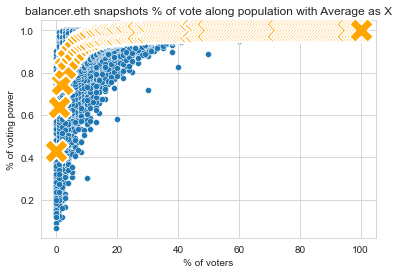

In [38]:
plt.rc("figure", figsize=(40, 20))
sns.set_style("whitegrid")
plt.rc("font", size=25)
data_means = crunch_data.groupby("percentage_voters_counted_stepped")["cum_percentage_of_total_vp","percentage_voters_counted"].agg("mean").reset_index()
##print(data_means)
plot_title = spacename + ' snapshots % of vote along population with Average as X'

ax=sns.scatterplot(data=crunch_data, y="cum_percentage_of_total_vp",x="percentage_voters_counted_stepped").set(title=plot_title,xlabel='% of voters',ylabel='% of voting power')
chart = sns.scatterplot(data=data_means,x="percentage_voters_counted_stepped",y="cum_percentage_of_total_vp",zorder=3, s=600,marker='X',color = 'orange')
#and save the chart file, too
plt.savefig(final_file+'\\'+spacename+' vote power distribution.png', dpi=100)

means_data_path =final_file+'\\'+spacename+'_means_'+'.csv'
data_means.to_csv(means_data_path, index = False)

print(chart)
data_means

The chart above shows what % of all possible votes has been cast (Y axis) as each incremental percent of the voting population casts their vote (X axis). Each line is a Proposal and has a unique color, so that a dot on each percent point represents what % of total voting power was accumulated by that group. The color represents which vote was cast.
The Orange X shows the average % of power accumulated across all elections.

In [39]:
p50 = db.query("select min(percentage_voters_counted) "
               "from data_means  where cum_percentage_of_total_vp>=0.5 ").df()
p50display = round(100*(p50.iloc[0,0]),2)
print('On average, a proposal at ', spacename, 'takes ',p50display,'% of the voting population.')

print('A total of ',leader_count, 'wallets have driven the result of all proposals at',spacename,)
print('That\'s', ("{0:.2%}".format(elite)), 'of all DAO voters.')

On average, a proposal at  balancer.eth takes  1.02 % of the voting population.
A total of  88 wallets have driven the result of all proposals at balancer.eth
That's 1.08% of all DAO voters.
